<a href="https://colab.research.google.com/github/buxkirill/reboot_DA/blob/main/math_stat/homeworks/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%BA_%D0%B7%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D1%8E_12_empty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

# ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле scipy.stats.

### Сгенерируйте примеры из распределения


In [2]:
# ваш код тут
# возьмем мат ожидание и дисперсию из википедии
k = 2
VAR = 2 * k
MEAN = k
chi2_rv = sts.chi2(df=k)
sample = chi2_rv.rvs(1000)

### Постройте гистограмму выборки и теоретическую плотность распределения


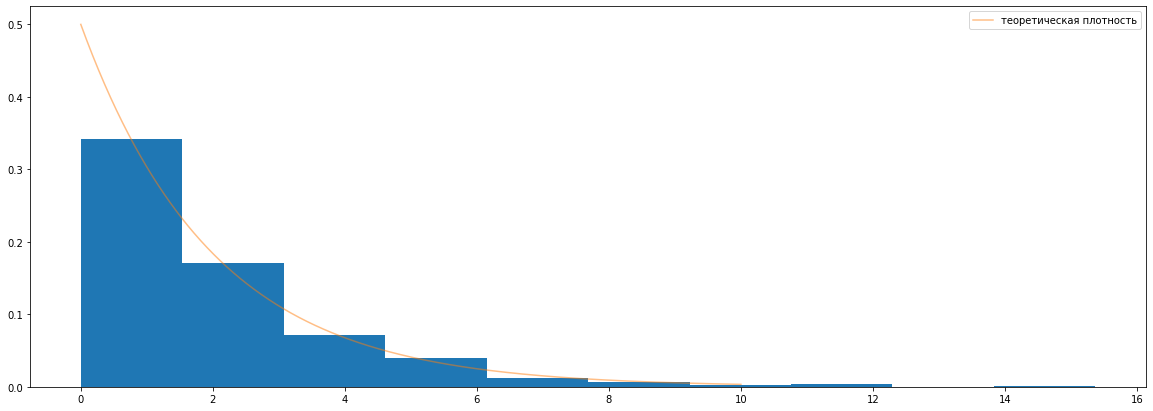

In [3]:
# ваш код тут
x = np.linspace(0,10,1000)
pdf = chi2_rv.pdf(x)

plt.figure(figsize=(20,7))
plt.hist(sample, density=True)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()
plt.show()

### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

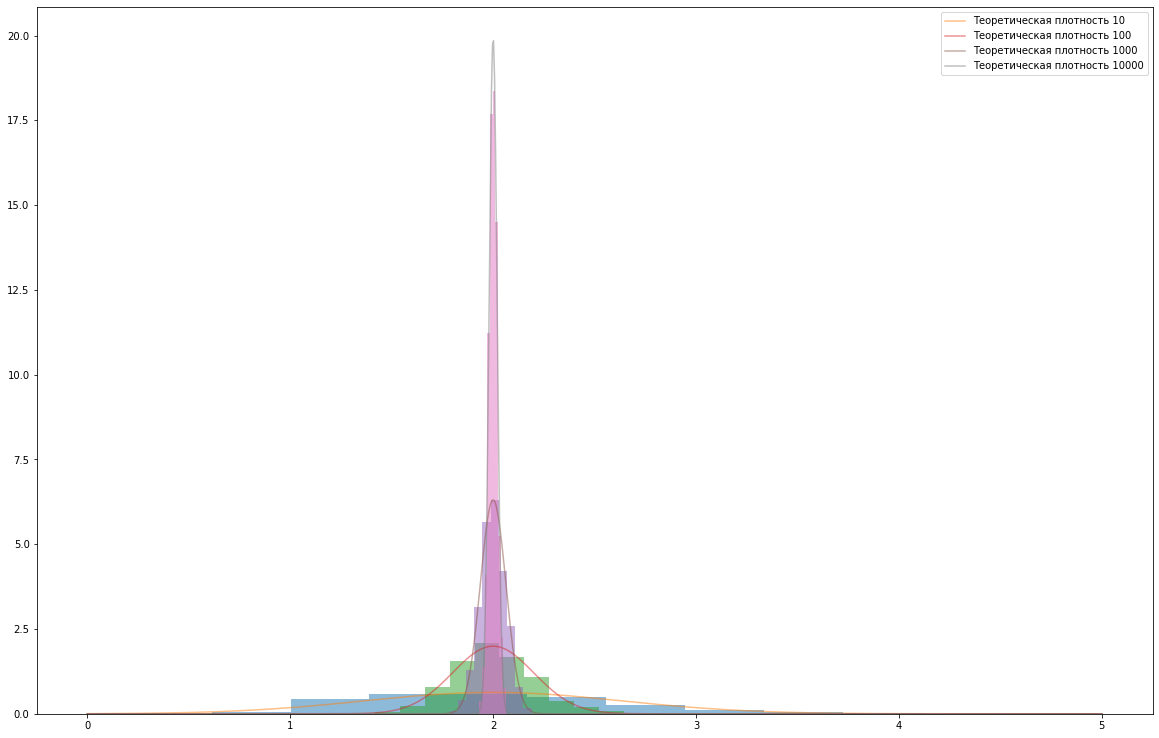

In [4]:
plt.figure(figsize=(20,13))
# сгенерируем много выборочных средних
for N in [10, 100, 1000, 10000]:
  
  # считаем среднее по выборке из N элементов 1000 раз
  means = []
  for i in range(1000):
    means.append(np.mean(chi2_rv.rvs(N)))
  
  # получаем нормальное распределение
  x = np.linspace(0, 5, 1000)
  norm_rv = sts.norm(loc=MEAN, scale=np.sqrt(VAR) / np.sqrt(N))
  pdf = norm_rv.pdf(x)

  # рисуем средние значения + нормальное распределение
  plt.hist(means, density=True, alpha=0.5)
  plt.plot(x, pdf, label=f'Теоретическая плотность {N}', alpha=0.5)
  plt.legend()
plt.show()


Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо? Ваш ответ:

***Для распределения хи-квадрат апроксимация выборочного среднего работает хорошо. Выборочное среднее значение очень близко к 2, что и является теоретически правильным мат.ожиданием***

### Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел).

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций from statsmodels.stats.weightstats import _zconfint_generic. Сравните результаты.

Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [ ]:
from statsmodels.stats.weightstats import _zconfint_generic
!wget 'https://drive.google.com/uc?export=download&id=1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8' -O './telecom_churn.csv'
df = pd.read_csv('telecom_churn.csv')

In [6]:
alpha = 0.05

mu_true = df[df['churn'] == True]['total day calls'].mean()
mu_false = df[df['churn'] == False]['total day calls'].mean()

sigma_true = df[df['churn'] == True]['total day calls'].std(ddof=1)
sigma_false = df[df['churn'] == False]['total day calls'].std(ddof=1)

norm_rv_true = sts.norm(mu_true, sigma_true)
norm_rv_false = sts.norm(mu_false, sigma_false)

qa_true = norm_rv_true.ppf(alpha/2)
qa_false = norm_rv_false.ppf(alpha/2)

qb_true = norm_rv_true.ppf(1-alpha/2)
qb_false = norm_rv_false.ppf(1-alpha/2)

print('Доверительный интервал для churn=true',
      (mu_true - qa_true * sigma_true / np.sqrt(len(df[df['churn'] == True])), 
      mu_true + qb_true * sigma_true / np.sqrt(len(df[df['churn'] == True]))))

print('Доверительный интервал для churn=false',
      (mu_false - qa_false * sigma_false / np.sqrt(len(df[df['churn'] == False])), 
      mu_false + qb_false * sigma_false / np.sqrt(len(df[df['churn'] == False]))))

Доверительный интервал для churn=true (43.36146137989761, 242.3900680106805)
Доверительный интервал для churn=false (77.48200497781501, 151.87398758667504)


In [7]:
print('Доверительный интервал для churn=true', 
      _zconfint_generic(mean=df[df['churn'] == True]['total day calls'].mean(),
                        std_mean=df[df['churn'] == True]['total day calls'].std(ddof=1),
                        alpha=0.05,
                        alternative='two-sided'))

print('Доверительный интервал для churn=false', 
      _zconfint_generic(mean=df[df['churn'] == False]['total day calls'].mean(),
                        std_mean=df[df['churn'] == False]['total day calls'].std(ddof=1),
                        alpha=0.05,
                        alternative='two-sided'))

Доверительный интервал для churn=true (59.03485888580106, 143.63594856761512)
Доверительный интервал для churn=false (61.47360341697314, 139.09271237250056)


**Ответ**:

Доверительные интервалы в методе _zconfint_generic равны значению sts.norm().ppf()

Доверительные интервалы для churn=false практически совпали. Для churn=true есть довольно большое различие. 

Данное различие можно объяснить небольшым размером выборки (483 объектов). У false 2850 объектов
